# Simulate Amazon stock prices

Using historical data from Yahoo for 2014-10-01 to 2016-09-30, we computed historical returns in a Google sheet, and now we will do a Monte Carlo simulation using the standard devision of returns.

Populating the interactive namespace from numpy and matplotlib
2625.8235577
3343.56471083


(array([ 0.00204536,  0.        ,  0.        ,  0.00051134,  0.00153402,
         0.00153402,  0.00409073,  0.00153402,  0.0025567 ,  0.00306804,
         0.00204536,  0.00971547,  0.00613609,  0.00613609,  0.0112495 ,
         0.0163629 ,  0.01278352,  0.01329486,  0.01687424,  0.01891961,
         0.01840826,  0.02556703,  0.02301033,  0.02710106,  0.01840826,
         0.02556703,  0.03068044,  0.02454435,  0.02505569,  0.02454435,
         0.01943095,  0.02249899,  0.0112495 ,  0.01534022,  0.01227218,
         0.00920413,  0.00920413,  0.00613609,  0.00613609,  0.00715877,
         0.00511341,  0.00153402,  0.00204536,  0.00153402,  0.0025567 ,
         0.00204536,  0.00051134,  0.00102268,  0.        ,  0.00102268]),
 array([ 788.22256692,  790.18606424,  792.14956157,  794.11305889,
         796.07655621,  798.04005354,  800.00355086,  801.96704818,
         803.93054551,  805.89404283,  807.85754015,  809.82103748,
         811.7845348 ,  813.74803212,  815.71152944,  817.675026

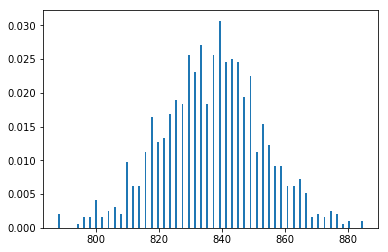

In [16]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

current_price = 837.31
sigma_one_day = 0.02

# for Monte Carlo, we generate random log returns, apply to the current price to find simulated future prices
num_trials = 1000
mean_daily_return = 0
simulated_log_returns = np.random.normal(mean_daily_return, sigma_one_day, num_trials)
simulated_prices = [current_price * np.exp(ret) for ret in simulated_log_returns]

num_shares_AMZN = 100
profit_and_loss = [num_shares_AMZN * (price - current_price) for price in simulated_prices]
var_quantile = 0.05
VaR = - sorted(profit_and_loss)[int(var_quantile * num_trials)]
print(VaR)

VaR_Excessions = [loss for loss in profit_and_loss if loss < - VaR]
ES = - np.mean(VaR_Excessions)
print(ES)

# num_bins = 50
# price_sigma = np.std(simulated_prices)
# plt.hist(profit_and_loss, bins = num_bins, normed = True, 
#          align = 'left', rwidth=0.3, 
#          range = (min(profit_and_loss), max(profit_and_loss)))

price_sigma = np.std(simulated_prices)
plt.hist(simulated_prices, bins = num_bins, normed = True, 
         align = 'left', rwidth=0.3, 
#          range = (current_price * 0.94, current_price * 1.06))
         range = (current_price - 3 * price_sigma, current_price + 3 * price_sigma)) # Why not normal? sigma!